# Project 5


_Marco_

## Importing stuff

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # see the value of multiple statements at once.
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df.shape

(7593, 204)

In [6]:
# David's code snippet
df = pd.read_csv('df.csv',index_col=0)
df.rename(index=str, columns={"MN_EARN_WNE_P10": "target"}, inplace=True)
df.head()

FileNotFoundError: File b'df.csv' does not exist

## Checking for `NaNs`

In [155]:
import pytest
nulls_check = df.isnull().any()
assert (nulls_check[nulls_check == False].tolist() == nulls_check.tolist())  # no nulls
if nulls_check[nulls_check == True].tolist() == []:
    print('No null values indeed!')

No null values indeed!


## EDA using `pandas-profiling`

In [152]:
#!pip install pandas-profiling

In [164]:
import pandas_profiling as pdp
pdp.ProfileReport(df)

## I will drop the `rejected` columns suggested by `pandas-profiling`:

In [165]:
cols_to_drop = ['ACTCMMID', 'ACTEN25', 'ACTEN75', 'ACTENMID', 'ACTMT25', 'ACTMTMID', 'ACTWRMID',
                'COUNT_ED', 'COUNT_NWNE_P6', 'COUNT_NWNE_P7', 'COUNT_NWNE_P8', 'COUNT_NWNE_P9', 
                'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC1_P6', 'COUNT_WNE_INC2_P10', 'COUNT_WNE_INC2_P6', 
                'COUNT_WNE_INC3_P10', 'COUNT_WNE_INC3_P6', 'COUNT_WNE_INDEP1_P10', 'COUNT_WNE_INDEP1_P6',
                'COUNT_WNE_MALE0_P10', 'COUNT_WNE_MALE0_P6', 'COUNT_WNE_MALE1_P10', 'COUNT_WNE_MALE1_P6', 
                'COUNT_WNE_P10', 'COUNT_WNE_P6', 'COUNT_WNE_P7', 'COUNT_WNE_P8', 'COUNT_WNE_P9', 
                'GRAD_DEBT_MDN10YR_SUPP', 'GT_25K_P7', 'GT_25K_P8', 'GT_25K_P9', 'HIGHDEG', 
                'LN_MEDIAN_HH_INC', 'MD_EARN_WNE_P6', 'MD_EARN_WNE_P8', 'MN_EARN_WNE_INC1_P10', 
                'MN_EARN_WNE_INC1_P6', 'MN_EARN_WNE_INC3_P10', 'MN_EARN_WNE_INC3_P6', 
                'MN_EARN_WNE_INDEP0_P10', 'MN_EARN_WNE_INDEP0_P6', 'MN_EARN_WNE_INDEP1_P10', 
                'MN_EARN_WNE_INDEP1_P6', 'MN_EARN_WNE_MALE0_P10', 'MN_EARN_WNE_MALE0_P6', 
                'MN_EARN_WNE_MALE1_P10', 'MN_EARN_WNE_MALE1_P6', 'MN_EARN_WNE_P7', 'MN_EARN_WNE_P8',
                'MN_EARN_WNE_P9', 'PCT10_EARN_WNE_P8', 'PCT25_EARN_WNE_P10', 'PCT25_EARN_WNE_P6', 
                'PCT25_EARN_WNE_P8', 'PCT75_EARN_WNE_P10', 'PCT75_EARN_WNE_P6', 'PCT75_EARN_WNE_P8',
                'PCT90_EARN_WNE_P10', 'PCT90_EARN_WNE_P6', 'PCT90_EARN_WNE_P8', 'SATMTMID', 
                'SATVRMID', 'SATWRMID', 'SAT_AVG', 'SAT_AVG_ALL', 
                'SD_EARN_WNE_P10', 'MD_EARN_WNE_P10']

In [166]:
df.shape
df = df.drop(cols_to_drop,axis=1)
df.shape
df.head()

(7593, 204)

(7593, 135)

UNITID      OPEID   OPEID6  HCM2  PREDDEG  CONTROL  LOCALE  HBCU  PBI  \
0  100654.0   100200.0   1002.0   0.0      3.0      1.0    12.0   1.0  0.0   
1  100663.0   105200.0   1052.0   0.0      3.0      1.0    12.0   0.0  0.0   
2  100690.0  2503400.0  25034.0   0.0      3.0      2.0    12.0   0.0  1.0   
3  100706.0   105500.0   1055.0   0.0      3.0      1.0    12.0   0.0  0.0   
4  100724.0   100500.0   1005.0   0.0      3.0      1.0    12.0   1.0  0.0   

   ANNHI  TRIBAL  AANAPII  HSI  NANTI  MENONLY  WOMENONLY   RELAFFIL  \
0    0.0     0.0      0.0  0.0    0.0      0.0        0.0  58.749885   
1    0.0     0.0      0.0  0.0    0.0      0.0        0.0  63.135781   
2    0.0     0.0      0.0  0.0    0.0      0.0        0.0  74.000000   
3    0.0     0.0      0.0  0.0    0.0      0.0        0.0  54.651651   
4    0.0     0.0      0.0  0.0    0.0      0.0        0.0  53.553273   

      SATVR25     SATVR75     SATMT25    SATMT75     SATWR25     SATWR75  \
0  383.000000  470.000000  360.000000  480.00000  370.000000  457.000000   
1  520.000000  630.000000  520.000000  668.00000  418.094067  540.799846   
2  517.077154  662.633714  464.672748  608.40267  533.678306  627.628730   
3  520.000000  650.000000  550.000000  680.00000  464.330872  581.458751   
4  370.000000  450.000000  360.000000  460.00000  372.397140  494.732700   

    ACTCM25    ACTCM75    ACTMT75   ACTWR25   ACTWR75  PCIP01  PCIP03  PCIP04  \
0  16.00000  19.000000  18.000000  6.000000  8.271124  0.0446  0.0023  0.0094   
1  22.00000  28.000000  26.000000  6.216473  8.000000  0.0000  0.0000  0.0000   
2  22.80373  26.982152  24.882746  6.059865  7.601796  0.0000  0.0000  0.0000   
3  24.00000  30.000000  29.000000  7.019736  8.328309  0.0000  0.0000  0.0000   
4  16.00000  19.000000  17.000000  5.619499  9.833736  0.0000  0.0000  0.0000   

   PCIP05  PCIP09  PCIP10  PCIP11  PCIP12  PCIP13  PCIP14  PCIP15  PCIP16  \
0  0.0000  0.0000  0.0164  0.0634     0.0  0.1268  0.1432  0.0587  0.0000   
1  0.0009  0.0426  0.0000  0.0133     0.0  0.0815  0.0577  0.0000  0.0069   
2  0.0000  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0000  0.0000   
3  0.0000  0.0216  0.0000  0.0315     0.0  0.0216  0.3027  0.0000  0.0162   
4  0.0000  0.0945  0.0000  0.0567     0.0  0.1531  0.0000  0.0000  0.0000   

   PCIP19  PCIP22  PCIP23  PCIP24  PCIP25  PCIP26  PCIP27  PCIP29  PCIP30  \
0  0.0188     0.0  0.0235  0.0423     0.0  0.1009  0.0094     0.0  0.0000   
1  0.0000     0.0  0.0192  0.0179     0.0  0.0715  0.0124     0.0  0.0000   
2  0.2453     0.0  0.0000  0.0566     0.0  0.0000  0.0000     0.0  0.0000   
3  0.0000     0.0  0.0126  0.0000     0.0  0.0712  0.0198     0.0  0.0009   
4  0.0000     0.0  0.0284  0.0000     0.0  0.0794  0.0302     0.0  0.0000   

   PCIP31  PCIP38  PCIP39  PCIP40  PCIP41  PCIP42  PCIP43  PCIP44  PCIP45  \
0  0.0000  0.0000  0.0000  0.0188     0.0  0.0282  0.0282  0.0516  0.0399   
1  0.0000  0.0073  0.0000  0.0174     0.0  0.0870  0.0366  0.0238  0.0408   
2  0.0000  0.0000  0.1698  0.0000     0.0  0.0000  0.1321  0.0000  0.0000   
3  0.0000  0.0072  0.0000  0.0216     0.0  0.0171  0.0000  0.0000  0.0189   
4  0.0151  0.0000  0.0000  0.0265     0.0  0.0624  0.1342  0.0548  0.0151   

   PCIP46  PCIP47  PCIP48  PCIP49  PCIP50  PCIP51  PCIP52  PCIP54  \
0     0.0     0.0     0.0     0.0  0.0258  0.0000  0.1479  0.0000   
1     0.0     0.0     0.0     0.0  0.0376  0.2231  0.1837  0.0188   
2     0.0     0.0     0.0     0.0  0.0000  0.0000  0.3962  0.0000   
3     0.0     0.0     0.0     0.0  0.0288  0.1892  0.2072  0.0117   
4     0.0     0.0     0.0     0.0  0.0473  0.0926  0.0983  0.0113   

   DISTANCEONLY     UGDS  UGDS_WHITE  UGDS_BLACK  UGDS_HISP  UGDS_ASIAN  \
0           0.0   4505.0      0.0340      0.9216     0.0058      0.0018   
1           0.0  11269.0      0.5863      0.2541     0.0317      0.0595   
2           1.0    308.0      0.2110      0.3409     0.0195      0.0000   
3           0.0   5829.0      0.7024      0.1230     0.

## Models



### Building functions for using multiple models at once

In [167]:
def get_modelname(model):
    name = str(model).partition('(')[0]
    return(name)

In [168]:
def evaluate_models(models, X, y):
    from sklearn.preprocessing import StandardScaler 
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.pipeline import Pipeline, make_pipeline

    scoring = 'r2'  #'neg_mean_squared_error'
    modelnames = []
    results = []
    for model in models:
        pipe = make_pipeline( StandardScaler(), model )
        kfold = KFold(n_splits=8, random_state=6, shuffle=True)
        cv_results = cross_val_score(pipe, X, y, cv=kfold, scoring=scoring)
        modelname = get_modelname(model)
        print ("%s: %.3f %.3f" %(modelname, cv_results.mean(), cv_results.std()))
        modelnames.append(modelname)
        results.append(cv_results)
    
    return(results)

In [160]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'HCM2', 'PREDDEG', 'CONTROL', 'LOCALE',
       'HBCU', 'PBI', 'ANNHI',
       ...
       'COUNT_WNE_INDEP0_INC1_P6', 'COUNT_WNE_INDEP0_P6',
       'MN_EARN_WNE_INC2_P6', 'MN_EARN_WNE_INDEP0_INC1_P6', 'SD_EARN_WNE_P7',
       'SD_EARN_WNE_P8', 'SD_EARN_WNE_P9', 'INSTNM', 'CITY', 'STABBR'],
      dtype='object', length=135)

## Dropping indexing columns

In [169]:
cols = ['INSTNM', 'CITY','STABBR']
df = df.drop(cols,axis=1)
X = df.drop('target',axis=1)
y = df['target']
X.head()
y.head()

UNITID      OPEID   OPEID6  HCM2  PREDDEG  CONTROL  LOCALE  HBCU  PBI  \
0  100654.0   100200.0   1002.0   0.0      3.0      1.0    12.0   1.0  0.0   
1  100663.0   105200.0   1052.0   0.0      3.0      1.0    12.0   0.0  0.0   
2  100690.0  2503400.0  25034.0   0.0      3.0      2.0    12.0   0.0  1.0   
3  100706.0   105500.0   1055.0   0.0      3.0      1.0    12.0   0.0  0.0   
4  100724.0   100500.0   1005.0   0.0      3.0      1.0    12.0   1.0  0.0   

   ANNHI  TRIBAL  AANAPII  HSI  NANTI  MENONLY  WOMENONLY   RELAFFIL  \
0    0.0     0.0      0.0  0.0    0.0      0.0        0.0  58.749885   
1    0.0     0.0      0.0  0.0    0.0      0.0        0.0  63.135781   
2    0.0     0.0      0.0  0.0    0.0      0.0        0.0  74.000000   
3    0.0     0.0      0.0  0.0    0.0      0.0        0.0  54.651651   
4    0.0     0.0      0.0  0.0    0.0      0.0        0.0  53.553273   

      SATVR25     SATVR75     SATMT25    SATMT75     SATWR25     SATWR75  \
0  383.000000  470.000000  360.000000  480.00000  370.000000  457.000000   
1  520.000000  630.000000  520.000000  668.00000  418.094067  540.799846   
2  517.077154  662.633714  464.672748  608.40267  533.678306  627.628730   
3  520.000000  650.000000  550.000000  680.00000  464.330872  581.458751   
4  370.000000  450.000000  360.000000  460.00000  372.397140  494.732700   

    ACTCM25    ACTCM75    ACTMT75   ACTWR25   ACTWR75  PCIP01  PCIP03  PCIP04  \
0  16.00000  19.000000  18.000000  6.000000  8.271124  0.0446  0.0023  0.0094   
1  22.00000  28.000000  26.000000  6.216473  8.000000  0.0000  0.0000  0.0000   
2  22.80373  26.982152  24.882746  6.059865  7.601796  0.0000  0.0000  0.0000   
3  24.00000  30.000000  29.000000  7.019736  8.328309  0.0000  0.0000  0.0000   
4  16.00000  19.000000  17.000000  5.619499  9.833736  0.0000  0.0000  0.0000   

   PCIP05  PCIP09  PCIP10  PCIP11  PCIP12  PCIP13  PCIP14  PCIP15  PCIP16  \
0  0.0000  0.0000  0.0164  0.0634     0.0  0.1268  0.1432  0.0587  0.0000   
1  0.0009  0.0426  0.0000  0.0133     0.0  0.0815  0.0577  0.0000  0.0069   
2  0.0000  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0000  0.0000   
3  0.0000  0.0216  0.0000  0.0315     0.0  0.0216  0.3027  0.0000  0.0162   
4  0.0000  0.0945  0.0000  0.0567     0.0  0.1531  0.0000  0.0000  0.0000   

   PCIP19  PCIP22  PCIP23  PCIP24  PCIP25  PCIP26  PCIP27  PCIP29  PCIP30  \
0  0.0188     0.0  0.0235  0.0423     0.0  0.1009  0.0094     0.0  0.0000   
1  0.0000     0.0  0.0192  0.0179     0.0  0.0715  0.0124     0.0  0.0000   
2  0.2453     0.0  0.0000  0.0566     0.0  0.0000  0.0000     0.0  0.0000   
3  0.0000     0.0  0.0126  0.0000     0.0  0.0712  0.0198     0.0  0.0009   
4  0.0000     0.0  0.0284  0.0000     0.0  0.0794  0.0302     0.0  0.0000   

   PCIP31  PCIP38  PCIP39  PCIP40  PCIP41  PCIP42  PCIP43  PCIP44  PCIP45  \
0  0.0000  0.0000  0.0000  0.0188     0.0  0.0282  0.0282  0.0516  0.0399   
1  0.0000  0.0073  0.0000  0.0174     0.0  0.0870  0.0366  0.0238  0.0408   
2  0.0000  0.0000  0.1698  0.0000     0.0  0.0000  0.1321  0.0000  0.0000   
3  0.0000  0.0072  0.0000  0.0216     0.0  0.0171  0.0000  0.0000  0.0189   
4  0.0151  0.0000  0.0000  0.0265     0.0  0.0624  0.1342  0.0548  0.0151   

   PCIP46  PCIP47  PCIP48  PCIP49  PCIP50  PCIP51  PCIP52  PCIP54  \
0     0.0     0.0     0.0     0.0  0.0258  0.0000  0.1479  0.0000   
1     0.0     0.0     0.0     0.0  0.0376  0.2231  0.1837  0.0188   
2     0.0     0.0     0.0     0.0  0.0000  0.0000  0.3962  0.0000   
3     0.0     0.0     0.0     0.0  0.0288  0.1892  0.2072  0.0117   
4     0.0     0.0     0.0     0.0  0.0473  0.0926  0.0983  0.0113   

   DISTANCEONLY     UGDS  UGDS_WHITE  UGDS_BLACK  UGDS_HISP  UGDS_ASIAN  \
0           0.0   4505.0      0.0340      0.9216     0.0058      0.0018   
1           0.0  11269.0      0.5863      0.2541     0.0317      0.0595   
2           1.0    308.0      0.2110      0.3409     0.0195      0.0000   
3           0.0   5829.0      0.7024      0.1230     0.

0    34300.0
1    46400.0
2    46100.0
3    50500.0
4    29500.0
Name: target, dtype: float64

In [179]:
df.corr().abs()['target'].sort_values(ascending=False).head(10)

target                         1.000000
MN_EARN_WNE_P6                 0.847594
SD_EARN_WNE_P8                 0.846422
MN_EARN_WNE_INC2_P10           0.844154
PCT10_EARN_WNE_P10             0.832335
SD_EARN_WNE_P7                 0.826983
PCT10_EARN_WNE_P6              0.800443
SD_EARN_WNE_P9                 0.798299
MN_EARN_WNE_INDEP0_INC1_P6     0.796634
MN_EARN_WNE_INDEP0_INC1_P10    0.785097
Name: target, dtype: float64

In [180]:
cols = ['MN_EARN_WNE_P6','SD_EARN_WNE_P8',               
'MN_EARN_WNE_INC2_P10',           
'PCT10_EARN_WNE_P10',             
'SD_EARN_WNE_P7',                 
'PCT10_EARN_WNE_P6',              
'SD_EARN_WNE_P9',                 
'MN_EARN_WNE_INDEP0_INC1_P6',     
'MN_EARN_WNE_INDEP0_INC1_P10']
print(cols)

['MN_EARN_WNE_P6', 'SD_EARN_WNE_P8', 'MN_EARN_WNE_INC2_P10', 'PCT10_EARN_WNE_P10', 'SD_EARN_WNE_P7', 'PCT10_EARN_WNE_P6', 'SD_EARN_WNE_P9', 'MN_EARN_WNE_INDEP0_INC1_P6', 'MN_EARN_WNE_INDEP0_INC1_P10']


In [182]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = []
models.append(LinearRegression())
models.append(Ridge(alpha=1.0))
models.append(Lasso(alpha=0.5))

results = evaluate_models(models, X, y)

LinearRegression: 0.915 0.020
Ridge: 0.915 0.020
Lasso: 0.915 0.020


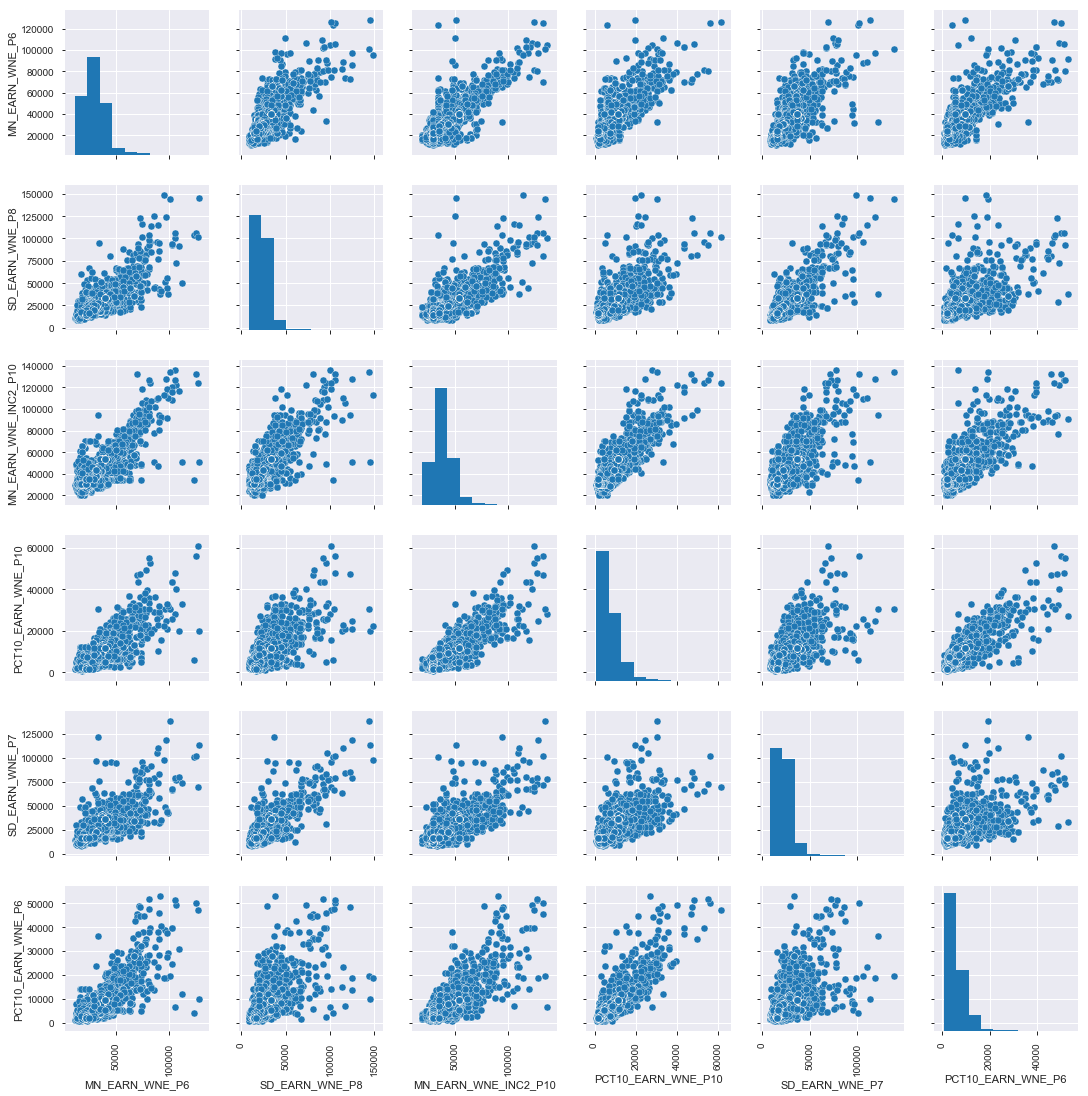

In [185]:
import seaborn as sns
cols_to_keep = ['MN_EARN_WNE_P6', 'SD_EARN_WNE_P8', 'MN_EARN_WNE_INC2_P10', 
                'PCT10_EARN_WNE_P10', 'SD_EARN_WNE_P7', 'PCT10_EARN_WNE_P6']

g = sns.pairplot(df[cols_to_keep])
for ax in g.axes.flatten():    
    for tick in ax.get_xticklabels(): 
        tick.set(rotation=90);